**Assignment for April 22nd**<br>
**Naoaki Motobayashi**

# 05 Case study 2_ Employee attitude surveys – engagement and workforce perceptions

## Table of Contents
- **Example 1: two constructs – exploratory factor analysis**
 - Loading Python Packages and the Data
 - Data Cleaning
 - Data Visualization
 - Data Transformation
 - Results - Applying Principal Component Analysis
 - Additional Analysis - Intuition Behind the Principal Components
 - Conclusion
- **Example 2: reliability analysis on a four-item engagement scale**
 - Results - Applying Reliability Analysis
 - Conclusion
- **Example 3: reliability and factor testing with group-level engagement data**
 - Loading the Data
 - Data Visualization
 - Data Transformation
 - Results - Applying Principal Component Analysis
 - Additional Analysis - Intuition Behind the Principal Components
 - Conclusion
- **Example 4: using the independent samples t-test to determine differences in engagement levels**
 - Loading the Data
 - Results
 - Conclusion
- **Example 5: using multiple regression to predict team-level engagement**
 - Data Cleaning
 - Results
 - Conclusion
- **Final Note**

# Example 1: two constructs – exploratory factor analysis

## Loading Python Packages and the Data

In [1]:
#pip install xlrd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import FactorAnalysis, PCA
from sklearn.preprocessing import StandardScaler
from scipy import stats

# We will use more packages in the subsequent code.

The dataset 'Chapter 5 RAW Survey Results.xls' contains 34 different variables that hold individual survey responses of 832 employees. The first five variables hold data linked to employees' demographic profiles and the remaining variables (6–34) are employee responses on a 1 'strongly disagree' to 5 'strongly agree' response scale for a range of specific questions (these are indicated).

In [2]:
df = pd.read_excel("Chapter 5 RAW Survey Results.xls")
pd.set_option('display.max_columns', None)
df.head()

,sex,jbstatus,age,tenure,ethnicity,ManMot1,ManMot2,ManMot3,ManMot4,ocb1,ocb2,ocb3,ocb4,aut1,aut2,aut3,Justice1,Justice2,Justice3,JobSat1,JobSat2,Quit1,Quit2,Quit3,Man1,Man2,Man3,Eng1,Eng2,Eng3,Eng4,pos1,pos2,pos3
0,2.0,1.0,6.0,14.0,14.0,1.0,1.0,1.0,2.0,1.0,2.0,3.0,4.0,1.0,1.0,1.0,3.0,3.0,3.0,2.0,3.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0
1,2.0,1.0,6.0,4.0,14.0,3.0,2.0,3.0,4.0,2.0,2.0,2.0,1.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,4.0,NaN,2.0,4.0,4.0,4.0
2,2.0,1.0,5.0,10.0,14.0,4.0,3.0,4.0,4.0,2.0,1.0,3.0,3.0,1.0,2.0,2.0,5.0,5.0,5.0,2.0,2.0,3.0,4.0,4.0,5.0,5.0,5.0,2.0,1.0,1.0,1.0,4.0,2.0,4.0
3,2.0,1.0,5.0,10.0,14.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,5.0,2.0,3.0,2.0,3.0,3.0,4.0,3.0,3.0,2.0,2.0,2.0,3.0,3.0,3.0,2.0,2.0,3.0,2.0,3.0,3.0,3.0
4,2.0,1.0,7.0,2.0,14.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,4.0,3.0,4.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0


In [3]:
print(df.shape)

(832, 34)


In [4]:
#df.info()

## Data Cleaning
In this example, data cleaning is done row basis and not column basis because we will select the columns to be analyzed later.

In [5]:
# FYI, If you want to do data cleaning on a column basis in the future, you can do something like the following.
# This code will not be executed unless # is removed, i.e., because it is commented out.

# Getting rid of the columns with more than 30% missing values.
#missing_fractions = dataset.isnull().mean().sort_values(ascending=False)
#missing_fractions.head(10)
#drop_list = sorted(list(missing_fractions[missing_fractions > 0.3].index))
#dataset.drop(labels=drop_list, axis=1, inplace=True)
#dataset.shape

In [6]:
# Checking for any null values and removing the null values
print('Null Values =',df.isnull().values.any())
# Fill the missing values with the last value available in the dataset
df = df.fillna(method='ffill')
# Drop the rows containing NA
df = df.dropna(axis=0)
# Fill NA with 0
#df = df.fillna('0')
df.head()

Null Values = True


,sex,jbstatus,age,tenure,ethnicity,ManMot1,ManMot2,ManMot3,ManMot4,ocb1,ocb2,ocb3,ocb4,aut1,aut2,aut3,Justice1,Justice2,Justice3,JobSat1,JobSat2,Quit1,Quit2,Quit3,Man1,Man2,Man3,Eng1,Eng2,Eng3,Eng4,pos1,pos2,pos3
0,2.0,1.0,6.0,14.0,14.0,1.0,1.0,1.0,2.0,1.0,2.0,3.0,4.0,1.0,1.0,1.0,3.0,3.0,3.0,2.0,3.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0
1,2.0,1.0,6.0,4.0,14.0,3.0,2.0,3.0,4.0,2.0,2.0,2.0,1.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,2.0,4.0,4.0,2.0,2.0,4.0,4.0,4.0
2,2.0,1.0,5.0,10.0,14.0,4.0,3.0,4.0,4.0,2.0,1.0,3.0,3.0,1.0,2.0,2.0,5.0,5.0,5.0,2.0,2.0,3.0,4.0,4.0,5.0,5.0,5.0,2.0,1.0,1.0,1.0,4.0,2.0,4.0
3,2.0,1.0,5.0,10.0,14.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,5.0,2.0,3.0,2.0,3.0,3.0,4.0,3.0,3.0,2.0,2.0,2.0,3.0,3.0,3.0,2.0,2.0,3.0,2.0,3.0,3.0,3.0
4,2.0,1.0,7.0,2.0,14.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,3.0,2.0,3.0,3.0,4.0,3.0,3.0,4.0,4.0,4.0,3.0,4.0,3.0,3.0,2.0,3.0,3.0,3.0,3.0,3.0


In [7]:
print(df.shape)

(832, 34)


In [8]:
#df.info()

## Data Visualization

<AxesSubplot:title={'center':'Correlation Matrix'}>

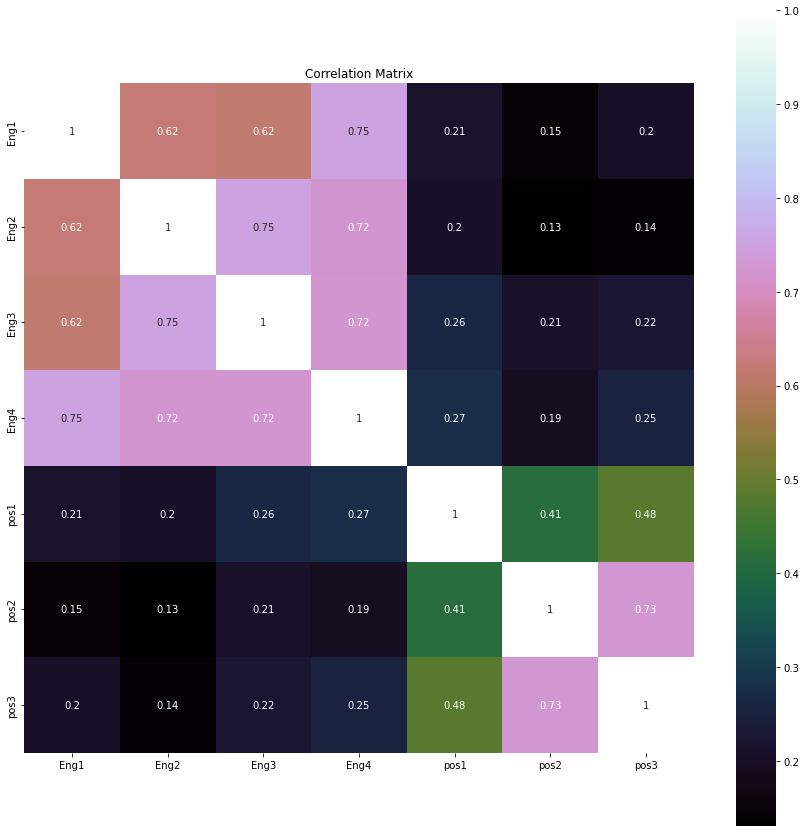

In [9]:
df_Eng1_pos3 = df[['Eng1','Eng2','Eng3','Eng4','pos1','pos2','pos3']]
# df_Eng1_pos3 = df.iloc[:,-7:] # The right one can also be used.

# Correlation
correlation = df_Eng1_pos3.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

## Data Transformation
Before applying PCA, all the variables should be on the same scale; otherwise, a feature with large values will dominate the result. Below we use StandardScaler in sklearn to standardize the dataset’s features onto a unit scale (mean = 0 and variance = 1). Standardization is a useful technique to transform attributes to a standard normal distribution with a mean of 0 and a standard deviation of 1 (c.f. Machine Learning & Data Science Blueprints for Finance).

In [10]:
scaler = StandardScaler().fit(df_Eng1_pos3)
rescaled_df = pd.DataFrame(scaler.fit_transform(df_Eng1_pos3),
                           columns = df_Eng1_pos3.columns, index = df_Eng1_pos3.index)
# Summarize transformed data
df_Eng1_pos3.dropna(how='any', inplace=True)
rescaled_df.dropna(how='any', inplace=True)
rescaled_df.head()

C:\Users\jazzn\AppData\Local\Temp\ipykernel_7764\2855245286.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Eng1_pos3.dropna(how='any', inplace=True)


,Eng1,Eng2,Eng3,Eng4,pos1,pos2,pos3
0,-0.623484,-0.334274,-0.529125,0.506378,-0.237934,-0.167301,-0.319159
1,1.348906,1.821665,-0.529125,-0.544262,0.893271,1.032648,0.882382
2,-0.623484,-1.412244,-1.624230,-1.594902,0.893271,-1.367250,0.882382
3,-0.623484,-0.334274,0.565980,-0.544262,-0.237934,-0.167301,-0.319159
4,0.362711,-0.334274,0.565980,0.506378,-0.237934,-0.167301,-0.319159


## Results - Applying Principal Component Analysis (PCA)
### We perform PCA on 'Eng1', 'Eng2', 'Eng3', 'Eng4', 'pos1', 'pos2', 'pos3'.
In machine learning, it is common to split the data into training and testing data at this time and use it later for holdout validation. However, since this is an exploratory analysis, this step is eliminated.

In [11]:
X = rescaled_df
pca = PCA()
PrincipalComponent = pca.fit(X)

### The results below correspond to "Figure 5.7 Factor analysis total variance explained".

In [12]:
print("eigenvalues")
print(pca.explained_variance_)

eigenvalues
[3.46119111 1.74902769 0.62895255 0.44256943 0.26334371 0.24602466
 0.21731444]


In [13]:
print("contribution ratio")
print(pca.explained_variance_ratio_)

contribution ratio
[0.49386157 0.24956078 0.08974237 0.06314821 0.03757531 0.03510414
 0.03100761]


In [14]:
print("cumulative contribution ratio")
print(np.cumsum(pca.explained_variance_ratio_))

cumulative contribution ratio
[0.49386157 0.74342236 0.83316473 0.89631294 0.93388826 0.96899239
 1.        ]


,Cumulative Explained Variance
0,49.39%
1,74.34%
2,83.32%
3,89.63%
4,93.39%
5,96.90%
6,100.00%


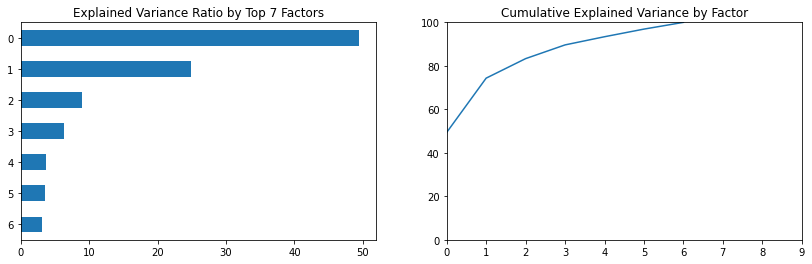

In [15]:
NumEigenvalues=7
fig, axes = plt.subplots(ncols=2, figsize=(14,4))
Series1 = pd.Series(pca.explained_variance_ratio_[:NumEigenvalues]).sort_values()*100
Series2 = pd.Series(pca.explained_variance_ratio_[:NumEigenvalues]).cumsum()*100
Series1.plot.barh(ylim=(0,9), label="woohoo",title='Explained Variance Ratio by Top 7 Factors',ax=axes[0]);
Series2.plot(ylim=(0,100),xlim=(0,9),ax=axes[1], title='Cumulative Explained Variance by Factor');
# Cumulative explained variance
pd.Series(np.cumsum(pca.explained_variance_ratio_)).to_frame('Cumulative Explained Variance').head(NumEigenvalues).style.format('{:,.2%}'.format)

Looking at component 1 (or factor 1), it has a total eigenvalue of 3.458 and accounts for 49.406 per cent of variance in the items. Component 2 (or factor 2) has a total eigenvalue of 1.767 and accounts for 25.244 per cent of the variance in the items. Looking at the two together, the cumulative percentage value tells us that they both account for 74.651 of the variancea in all of the items.

### The results below correspond to "Figure 5.8 Rotated component matrix".

In [16]:
#pip install factor_analyzer
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(n_factors=2, method='principal', rotation="varimax")
fa.fit(X)
print("Rotated component matrix")
print(fa.loadings_.round(3))

Rotated component matrix
[[0.837 0.117]
 [0.881 0.068]
 [0.862 0.169]
 [0.893 0.176]
 [0.189 0.695]
 [0.051 0.878]
 [0.092 0.898]]


C:\Users\jazzn\anaconda3\envs\zemi\lib\site-packages\sklearn\utils\extmath.py:368: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


It is possible to see that the first four questions have high (above 0.6) factor loadings on component 1, and the bottom three questions have high factor loadings (above 0.6) on component 2.

## Additional Analysis - Intuition Behind the Principal Components
We first have a function to determine the weights of each principal component. We then perform the visualization of the principal components.

In [17]:
print("PCA components")
print(pca.components_)

PCA components
[[ 0.42546846  0.43365732  0.45039282  0.46690311  0.26814558  0.2502317
   0.27485954]
 [-0.2257591  -0.27428151 -0.20047639 -0.20632295  0.39321002  0.56492359
   0.56328479]
 [ 0.07740194  0.01579985  0.02425785  0.02322234 -0.87229717  0.4078003
   0.25578927]
 [ 0.71116122 -0.44086265 -0.47141769  0.21678232  0.01559041 -0.13675012
   0.10824498]
 [ 0.21913165 -0.01011263 -0.06280191 -0.12167021  0.10888045  0.64704509
  -0.70894924]
 [ 0.01324958 -0.71629211  0.69361619  0.03528654 -0.01472299 -0.00937714
  -0.06400631]
 [ 0.45615113  0.17007299  0.22155121 -0.82210078  0.01633092 -0.12036806
   0.15268111]]


In [18]:
def PCWeights():
    weights = pd.DataFrame()

    for i in range(len(pca.components_)):
        weights["weights_{}".format(i)] = pca.components_[i] / sum(pca.components_[i])

    weights = weights.values.T
    return weights

weights=PCWeights()

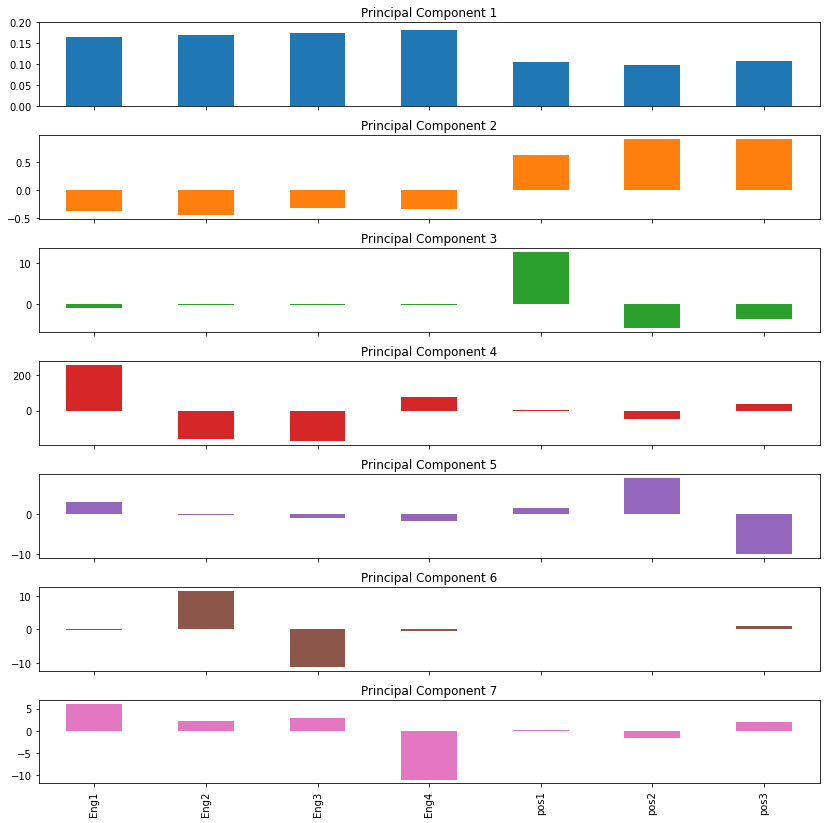

In [19]:
weights = PCWeights()
NumComponents=7

topPortfolios = pd.DataFrame(weights[:NumComponents], columns=X.columns)
topPortfolios.index = [f'Principal Component {i}' for i in range(1, NumComponents+1)]

axes = topPortfolios.T.plot.bar(subplots=True, legend=False,figsize=(14,14))
plt.subplots_adjust(hspace=0.35)
axes[0].set_ylim(0, .2);

## Conclusion
**"Our questions are measuring two latent variables: engagement and perceived organizational support."**

# Example 2: reliability analysis on a four-item engagement scale

## Results - Applying Reliability Analysis
### We perform PCA on 'ocb1', 'ocb2', 'ocb3', 'ocb4'.

In [20]:
df_ocb1_ocb4 = df[['ocb1','ocb2','ocb3','ocb4']]
df_ocb1_ocb4.head()

,ocb1,ocb2,ocb3,ocb4
0,1.0,2.0,3.0,4.0
1,2.0,2.0,2.0,1.0
2,2.0,1.0,3.0,3.0
3,3.0,3.0,3.0,5.0
4,1.0,2.0,2.0,1.0


### The results below correspond to "Figure 5.13 Reliability analysis output".

In [21]:
#pip install pingouin
import pingouin as pg
print("Cronbach's Alpha")
print(pg.cronbach_alpha(data=df_ocb1_ocb4))

Cronbach's Alpha
(0.6693878534725416, array([0.631, 0.705]))


Cronbach's Alpha turns out to be 0.669. The 95% confidence interval for Cronbach's Alpha is also given as [0.631, 0.705]. Since Cronbach's Alpha is below 0.7 and above 0.6, we conclude that the internal consistency of this survey is questionable.

In [22]:
#pip install psython
#!pip install PrettyTable
import psython as psy
psy.cronbach_alpha_scale_if_deleted(df_ocb1_ocb4)

C:\Users\jazzn\anaconda3\envs\zemi\lib\site-packages\psython\__init__.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Item': column, "Scale Mean if Item Deleted": scale_mean, "Scale Variance if Item Deleted": variance,
C:\Users\jazzn\anaconda3\envs\zemi\lib\site-packages\psython\__init__.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Item': column, "Scale Mean if Item Deleted": scale_mean, "Scale Variance if Item Deleted": variance,
C:\Users\jazzn\anaconda3\envs\zemi\lib\site-packages\psython\__init__.py:22: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'Item': column, "Scale Mean if Item Deleted": scale_mean, "Scale Variance if Item Delete

[(0.6693878534725416, array([0.631, 0.705])),
    Item Scale Mean if Item Deleted Scale Variance if Item Deleted  \
 0  ocb1                   7.539663                        6.37869   
 1  ocb2                   7.128606                       5.924476   
 2  ocb3                    6.94351                       5.413171   
 3  ocb4                   6.307692                       5.269832   
 
   Corrected Item-Total Correlation Cronbach's Alpha if Item Deleted  
 0                         0.519288                         0.580577  
 1                         0.555951                         0.548144  
 2                         0.567576                         0.525163  
 3                         0.292388                          0.77151  ]

Looking through these values, it shows that the Cronbach's alpha would be much higher value of 0.77151 if the last question, 'I go the extra mile', was deleted from the responses. Although from a face validity point of view ‘I go the extra mile’ might be a reasonable question to ask if one wants to measure ‘going the extra mile’, and this might be valid to a degree, because it could have a number of interpretations it could lead to low reliability and high measurement error.

## Conclusion
**"The three items of 'I work harder than my job requires', 'I put a huge amount of effort into my job', and 'I help out my teammates' form a coherent scale and can be interpreted as being a reliable measure of organizational citizenship behaviour."**

# Example 3: reliability and factor testing with group-level engagement data

## Loading the Data
The data set 'Chapter 5 SURVEY PROVIDER ENGAGEMENT DATA TEAM LEVEL.xls' measures the percentage of team members who answered positively on nine engagement measures in 212 teams.

In [23]:
df = pd.read_excel("Chapter 5 SPEDTL.xls")
pd.set_option('display.max_columns', None)
df.head()

,Eng1,Eng2,Eng3,Eng4,Eng5,Eng6,Eng7,Eng8,Eng9
0,100,100,97,50,80,77,80,100,90
1,90,90,88,20,30,27,70,60,65
2,100,100,83,60,60,60,100,100,100
3,80,100,86,30,30,43,100,90,95
4,100,100,99,100,100,100,100,100,100


In [24]:
print(df.shape)

(212, 9)


In [25]:
#df.info()

In [26]:
# Checking for any null values and removing the null values
print('Null Values =',df.isnull().values.any())

Null Values = False


## Data Visualization

<AxesSubplot:title={'center':'Correlation Matrix'}>

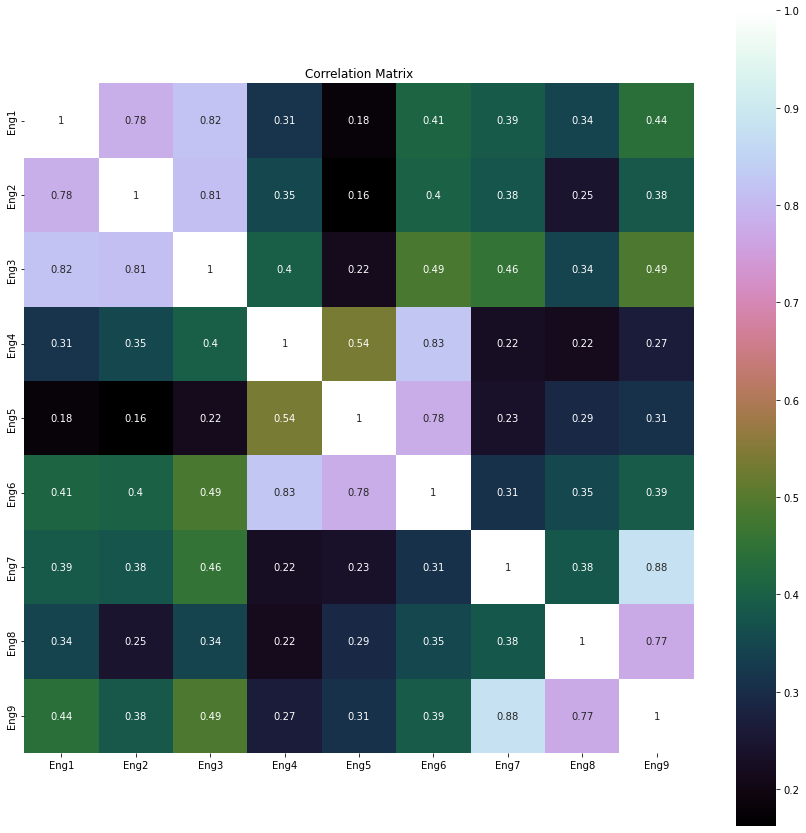

In [27]:
# Correlation
correlation = df.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

## Data Transformation

In [28]:
scaler = StandardScaler().fit(df)
rescaled_df = pd.DataFrame(scaler.fit_transform(df),
                           columns = df.columns, index = df.index)
# Summarize transformed data
df.dropna(how='any', inplace=True)
rescaled_df.dropna(how='any', inplace=True)
rescaled_df.head()

,Eng1,Eng2,Eng3,Eng4,Eng5,Eng6,Eng7,Eng8,Eng9
0,0.965089,0.910410,1.358956,-0.574626,0.168903,0.432918,-0.269052,0.892496,0.278681
1,0.139761,0.175705,0.531086,-2.196021,-2.700279,-2.991654,-0.960435,-2.797589,-2.088321
2,0.965089,0.910410,0.071159,-0.034161,-0.978770,-0.731437,1.113714,0.892496,1.225482
3,-0.685567,0.910410,0.347115,-1.655556,-2.700279,-1.895791,1.113714,-0.030025,0.752081
4,0.965089,0.910410,1.542927,2.127698,1.316575,2.008220,1.113714,0.892496,1.225482


## Results - Applying Principal Component Analysis (PCA)

In [29]:
X = rescaled_df
pca = PCA()
PrincipalComponent = pca.fit(X)

### The results below correspond to "Figure 5.15 Total variance explained in team-level engagement data".

In [30]:
print("eigenvalues")
print(pca.explained_variance_)

eigenvalues
[4.52800753e+00 1.62442106e+00 1.37668438e+00 6.22866847e-01
 4.26760921e-01 2.10008309e-01 1.68892405e-01 8.45980762e-02
 4.14496655e-04]


In [31]:
print("contribution ratio")
print(pca.explained_variance_ratio_)

contribution ratio
[5.00738778e-01 1.79639855e-01 1.52243399e-01 6.88809773e-02
 4.71942109e-02 2.32241893e-02 1.86773048e-02 9.35544763e-03
 4.58379424e-05]


In [32]:
print("cumulative contribution ratio")
print(np.cumsum(pca.explained_variance_ratio_))

cumulative contribution ratio
[0.50073878 0.68037863 0.83262203 0.90150301 0.94869722 0.97192141
 0.99059871 0.99995416 1.        ]


,Cumulative Explained Variance
0,50.07%
1,68.04%
2,83.26%
3,90.15%
4,94.87%
5,97.19%
6,99.06%
7,100.00%
8,100.00%


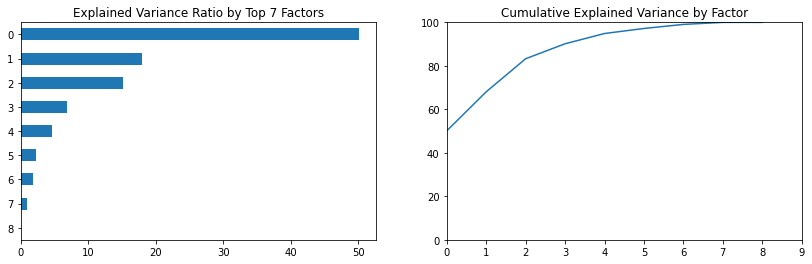

In [33]:
NumEigenvalues=9
fig, axes = plt.subplots(ncols=2, figsize=(14,4))
Series1 = pd.Series(pca.explained_variance_ratio_[:NumEigenvalues]).sort_values()*100
Series2 = pd.Series(pca.explained_variance_ratio_[:NumEigenvalues]).cumsum()*100
Series1.plot.barh(ylim=(0,9), label="woohoo",title='Explained Variance Ratio by Top 7 Factors',ax=axes[0]);
Series2.plot(ylim=(0,100),xlim=(0,9),ax=axes[1], title='Cumulative Explained Variance by Factor');
# Cumulative explained variance
pd.Series(np.cumsum(pca.explained_variance_ratio_)).to_frame('Cumulative Explained Variance').head(NumEigenvalues).style.format('{:,.2%}'.format)

We have three eigenvalues produced above 1, which suggests that there are three possible factors in our scale. Corresponding with these three eigenvalues that are greater than 1, our rotated component matrix below has three columns.

### The results below correspond to "Figure 5.16 Rotated component matrix in team-level engagement data".

In [34]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(n_factors=3, method='principal', rotation="varimax")
fa.fit(X)
print("Rotated component matrix")
print(fa.loadings_.round(3))

Rotated component matrix
[[ 0.883  0.134  0.23 ]
 [ 0.907  0.148  0.146]
 [ 0.878  0.207  0.264]
 [ 0.263  0.839  0.049]
 [-0.03   0.859  0.21 ]
 [ 0.279  0.911  0.188]
 [ 0.275  0.083  0.805]
 [ 0.101  0.195  0.786]
 [ 0.24   0.155  0.955]]


C:\Users\jazzn\anaconda3\envs\zemi\lib\site-packages\sklearn\utils\extmath.py:368: FutureWarning: If 'random_state' is not supplied, the current default is to use 0 as a fixed seed. This will change to  None in version 1.2 leading to non-deterministic results that better reflect nature of the randomized_svd solver. If you want to silence this warning, set 'random_state' to an integer seed or to None explicitly depending if you want your code to be deterministic or not.
  warnings.warn(


We can see that each of the columns tends to have three items that load together onto each of the components with loadings that are greater than 0.70. This provides us with information about what items tend to load together into particular factors.

### The results below correspond to "Figure 5.17 A very stylish 3D graph".

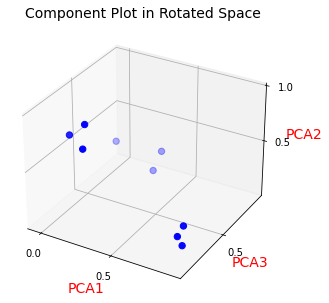

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Add figure
fig = plt.figure(figsize = (5, 5))

# Add 3DAxes
ax = fig.add_subplot(111, projection='3d')

# Set the title of Axes
ax.set_title("Component Plot in Rotated Space", size = 14)

# Set axis labels
ax.set_xlabel("PCA1", size = 14, color = "r") #PC is more appropriate than PCA.
ax.set_ylabel("PCA3", size = 14, color = "r") #PC is more appropriate than PCA.
ax.set_zlabel("PCA2", size = 14, color = "r") #PC is more appropriate than PCA.

# Set axis scale
ax.set_xticks([-1.0, -0.5, 0.0, 0.5, 1.0])
ax.set_yticks([-1.0, -0.5, 0.0, 0.5, 1.0])
ax.set_zticks([-1.0, -0.5, 0.0, 0.5, 1.0])

# Assign numerical values
x = [0.883, 0.907, 0.878, 0.263, -0.03, 0.279, 0.275, 0.101, 0.24]
y = [0.134, 0.148, 0.207, 0.839, 0.859, 0.911, 0.083, 0.195, 0.155]
z = [0.23, 0.146, 0.264, 0.049, 0.21, 0.188, 0.805, 0.786, 0.955]

#x = fa.loadings_.round(3)[:, 0]
#y = fa.loadings_.round(3)[:, 1]
#z = fa.loadings_.round(3)[:, 2]

# Draw a curve
ax.scatter(x, y, z, s = 40, c = "blue")

plt.show()

## Additional Analysis - Intuition Behind the Principal Components
We first have a function to determine the weights of each principal component. We then perform the visualization of the principal components.

In [36]:
print("PCA components")
print(pca.components_)

PCA components
[[-3.57812052e-01 -3.46101007e-01 -3.83548494e-01 -3.00403311e-01
  -2.61118272e-01 -3.60205653e-01 -3.17365089e-01 -2.88155760e-01
  -3.64894268e-01]
 [ 2.54542297e-01  2.31194095e-01  2.13326445e-01 -4.62886461e-01
  -5.27035890e-01 -4.69040241e-01  2.46369587e-01  1.10681631e-01
   2.26432084e-01]
 [-3.50920619e-01 -4.18748572e-01 -3.27947449e-01 -1.29337677e-01
   1.38849600e-01 -4.95719600e-02  3.61548955e-01  4.44954332e-01
   4.76222631e-01]
 [ 1.58905882e-01 -2.27696774e-03  2.35023895e-02 -1.17567576e-01
   3.66191314e-03 -4.85437351e-03 -6.57107725e-01  7.22743324e-01
  -7.86370710e-02]
 [-1.62953718e-01 -6.95004339e-02 -2.96319266e-02  6.80568731e-01
  -6.91834950e-01  2.67893528e-02 -1.74126979e-02  1.42511216e-01
   6.78086288e-02]
 [ 6.32981019e-01 -7.50270426e-01  1.08935538e-01  2.43696460e-02
  -7.57104419e-02  7.37209022e-02  4.61824660e-02 -1.00731082e-01
  -2.28489151e-02]
 [ 4.80313985e-01  2.83218916e-01 -8.10326224e-01  1.38676567e-01
   2.64496200

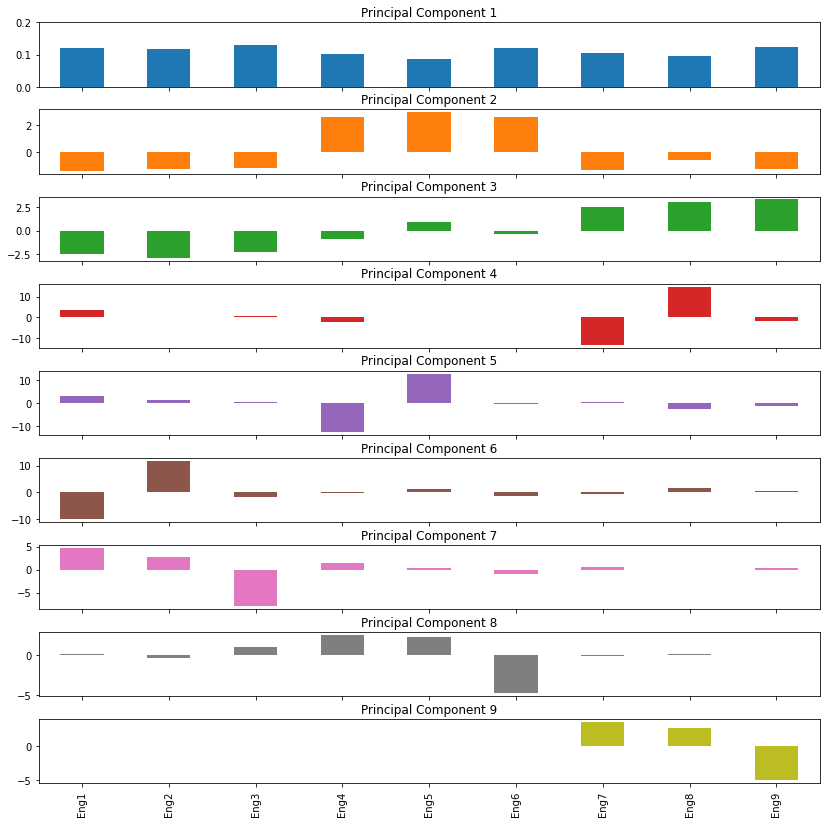

In [37]:
weights = PCWeights()
NumComponents=9

topPortfolios = pd.DataFrame(weights[:NumComponents], columns=X.columns)
topPortfolios.index = [f'Principal Component {i}' for i in range(1, NumComponents+1)]

axes = topPortfolios.T.plot.bar(subplots=True, legend=False,figsize=(14,14))
plt.subplots_adjust(hspace=0.35)
axes[0].set_ylim(0, .2);

## Conclusion
**"Our data suggests that if the survey provider created a composite measure comprised of all nine survey questions and used it as an indicator of team-level engagement, they would be misrepresenting the survey data and ignoring the fact that the nine questions (as shown in Figure 5.16) seem to be clustering into three separate constructs. Looking at the face validity of the questions, the first three appear to be about engagement, questions 4–6 are similar and appear to be about work–life balance, whilst the last three are more about perception of the organization’s ethics."**

# Example 4: using the independent samples t-test to determine differences in engagement levels

## Loading the data
The dataset 'Chapter 5 Engagement CASE Group level data.xls' includes a combination of team-level HR metrics, employee demographic data and engagement survey data.

In [38]:
df = pd.read_excel("Chapter 5 Engagement CASE Group level  data.xls")
pd.set_option('display.max_columns', None)
df.head()

,DepartmentGroupNumber,GroupSize,PercentMale,BAME,NumberTeamLeads,NumberFeMaleTeamLeads,Location,LondonorNot,Function,EMPsurvEngage_1,EMPsurvEngage_2,EMPsurvEngage_3,EMPsurvEngage_4,EMPsurvEngage_5,EMPsurvEngage_6,EMPsurvEngage_7,EMPsurvEngage_8,EMPsurvEngage_9,EMPsurvEngagement,EMPorgIntegrity1,EMPorgIntegrity2,EMPorgIntegrity3,EMPorgIntegrity4,EMPorgIntegrity5,EmpSurvOrgIntegrity,EMPsurvSUP1,EMPsurvSUP2,EMPsurvSUP3,EMPsurvSUP4,EmpSurvSupervisor
0,1,13,100,0.03,2,0.0,3,2,1,100,100,100,85,100,92,92,77,77,91,92,92,92,92,1,73.8,92,92,85,92,90.25
1,2,41,67,0.04,6,0.0,2,1,1,93,98,93,90,100,88,90,59,85,88,59,80,88,83,2,62.4,83,85,85,85,84.50
2,3,28,65,0.25,4,2.0,3,2,1,89,96,96,82,100,74,89,57,93,86,57,96,100,79,3,67.0,93,79,82,93,86.75
3,4,43,65,0.02,6,0.0,3,2,1,93,93,88,60,98,67,88,47,81,80,42,93,98,84,4,64.2,70,67,70,70,69.25
4,5,10,25,0.10,1,0.0,2,1,2,100,100,100,100,100,100,100,70,100,97,80,100,100,90,5,75.0,100,100,80,70,87.50


In [39]:
print(df.shape)

(927, 30)


In [40]:
#df.info()

## Results
### Below are the steps to "Figure 5.20 First t-test result: engagement comparing inner London versus non-London teams" and their results.
- 1 = London
- 2 = Other Location

In [41]:
# This may not make much sense.
print(df['LondonorNot'].describe())

count    927.000000
mean       1.425027
std        0.494614
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: LondonorNot, dtype: float64


In [42]:
LondonorNot = df['LondonorNot']
EMPsurvEngagement = df['EMPsurvEngagement']
LondonorNot.value_counts()

1    533
2    394
Name: LondonorNot, dtype: int64

In [43]:
London = LondonorNot == 1.0
OtherLocation = LondonorNot == 2.0
London.head()

0    False
1     True
2    False
3    False
4     True
Name: LondonorNot, dtype: bool

In [44]:
EngLondonCatScores1 = EMPsurvEngagement[London].dropna()
EngLondonCatScores2 = EMPsurvEngagement[OtherLocation].dropna()

In [45]:
stats.ttest_ind(EngLondonCatScores1, EngLondonCatScores2)

Ttest_indResult(statistic=1.3157376412423551, pvalue=0.18858811412701523)

In [46]:
stats.ttest_ind(EngLondonCatScores1, EngLondonCatScores2, equal_var=False)

Ttest_indResult(statistic=1.3200931644368545, pvalue=0.18715641748333767)

Levene's test shows a significance value of 0.187, so we can assume equal variance patterns in EMPsurvEngagement across our two egional and geographical groupings as p>0.05.

'The t-test was not significant: t(925)= 1.316, p>0.1. There is no significant difference in engagement between teams based in London and those that are based in non-London locations; London (mean=81.5478, SD=10.10528) is not significantly different to Other Locations (mean=80.6726, SD=9.88519).'

### Below are the steps to "Figure 5.21 Second t-test result: engagement comparing Sales versus Professional Service teams" and their results.
- 1 = Sales
- 2 = Professional Service 

In [47]:
# This may not make much sense.
print(df['Function'].describe())

count    927.000000
mean       1.458468
std        0.498541
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: Function, dtype: float64


In [48]:
Function = df['Function']
EMPsurvEngagement = df['EMPsurvEngagement']
Function.value_counts()

1    502
2    425
Name: Function, dtype: int64

In [49]:
Sales = Function == 1.0
ProfessionalService = Function == 2.0
Sales.head()

0     True
1     True
2     True
3     True
4    False
Name: Function, dtype: bool

In [50]:
EngFunctionCatScores1 = EMPsurvEngagement[Sales].dropna()
EngFunctionCatScores2 = EMPsurvEngagement[ProfessionalService].dropna()

In [51]:
stats.ttest_ind(EngFunctionCatScores1, EngFunctionCatScores2)

Ttest_indResult(statistic=-6.873154849493818, pvalue=1.1534793371387033e-11)

In [52]:
stats.ttest_ind(EngFunctionCatScores1, EngFunctionCatScores2, equal_var=False)

Ttest_indResult(statistic=-6.943249355066502, pvalue=7.2197564554700875e-12)

Levene's test shows a significance value of 0.024, so we cannot assume equal variance patterns in EMPsurvEngagement across our two functional groupings as p<0.05.

'The t-test was significant: t(923.209)= –6.943, p<0.001. There is a significant difference in engagement scores of teams where employees work in the Sales function compared to teams from Professional Services. Sales teams (mean=79.1454, SD=10.30226) are significantly less engaged than teams from Professional Services (mean=83.5741, SD=9.11327).'

## Conclusion
**"The difference in engagement means of 81.55 for London compared to 80.67 for other locations should not be taken seriously as it could easily have occurred by random chance fluctuations in team engagement levels."**

**"Team engagement scores are significantly different across the functions. We can actually say with 99.9 per cent confidence that there is a significant difference in engagement results between people who work in the Sales Function (customer facing) and people who work in the Professional Services function (non-customer facing). Professional Services teams are significantly more engaged than those in the Sales function. Given that it is people in the sales function who deal directly with customers, this highlights a key challenge to be addressed in any engagement strategy."**

# Example 5: using multiple regression to predict team-level engagement

In [53]:
df.head()

,DepartmentGroupNumber,GroupSize,PercentMale,BAME,NumberTeamLeads,NumberFeMaleTeamLeads,Location,LondonorNot,Function,EMPsurvEngage_1,EMPsurvEngage_2,EMPsurvEngage_3,EMPsurvEngage_4,EMPsurvEngage_5,EMPsurvEngage_6,EMPsurvEngage_7,EMPsurvEngage_8,EMPsurvEngage_9,EMPsurvEngagement,EMPorgIntegrity1,EMPorgIntegrity2,EMPorgIntegrity3,EMPorgIntegrity4,EMPorgIntegrity5,EmpSurvOrgIntegrity,EMPsurvSUP1,EMPsurvSUP2,EMPsurvSUP3,EMPsurvSUP4,EmpSurvSupervisor
0,1,13,100,0.03,2,0.0,3,2,1,100,100,100,85,100,92,92,77,77,91,92,92,92,92,1,73.8,92,92,85,92,90.25
1,2,41,67,0.04,6,0.0,2,1,1,93,98,93,90,100,88,90,59,85,88,59,80,88,83,2,62.4,83,85,85,85,84.50
2,3,28,65,0.25,4,2.0,3,2,1,89,96,96,82,100,74,89,57,93,86,57,96,100,79,3,67.0,93,79,82,93,86.75
3,4,43,65,0.02,6,0.0,3,2,1,93,93,88,60,98,67,88,47,81,80,42,93,98,84,4,64.2,70,67,70,70,69.25
4,5,10,25,0.10,1,0.0,2,1,2,100,100,100,100,100,100,100,70,100,97,80,100,100,90,5,75.0,100,100,80,70,87.50


In [54]:
print(df.shape)

(927, 30)


## Data Cleaning

In [55]:
print('Null Values =',df.isnull().values.any())

Null Values = True


In [56]:
df = df.dropna()
np.where(np.isnan(df))

(array([], dtype=int64), array([], dtype=int64))

## Results
### Below are the steps to "Figure 5.24 Analysis output for our model predicting team engagement" and their results.

In [57]:
from sklearn.linear_model import LinearRegression
# Setting the value for X and Y
x = df[['EmpSurvSupervisor', 'EmpSurvOrgIntegrity', 'GroupSize', 'PercentMale', 'BAME', 'LondonorNot', 'Function']]
y = df['EMPsurvEngagement']

In [58]:
mlr = LinearRegression()  
mlr.fit(x, y)

LinearRegression()

In [59]:
print("intercept")
print(mlr.intercept_)

intercept
53.52149518273649


In [60]:
print("coefficients or betas")
list(zip(x, mlr.coef_))

coefficients or betas


[('EmpSurvSupervisor', 0.4859785716565218),
 ('EmpSurvOrgIntegrity', -0.0018955676445770054),
 ('GroupSize', -0.03244340448088385),
 ('PercentMale', -0.13829774754217516),
 ('BAME', 0.8558746328764019),
 ('LondonorNot', -0.7142646629247569),
 ('Function', -1.2370168422082553)]

In [61]:
# Splitting the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# Prediction of test set
y_pred_mlr= mlr.predict(x_test)

# Predicted values
#print("Prediction for test set: {}".format(y_pred_mlr))

# Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})

# Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 37.01
Mean Absolute Error: 5.542983179409234
Mean Square Error: 52.14337592770418
Root Mean Square Error: 7.221037039629708


### Alternative - use statsmodels.api.

In [62]:
import statsmodels.api as sm
x = sm.add_constant(x)
mod = sm.OLS(y, x)
mlr = mod.fit()
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      EMPsurvEngagement   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     60.59
Date:                Fri, 22 Apr 2022   Prob (F-statistic):           2.24e-68
Time:                        02:24:57   Log-Likelihood:                -2555.6
No. Observations:                 730   AIC:                             5127.
Df Residuals:                     722   BIC:                             5164.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  53.5215      3.457     15.482      0.000      46.735      60.308
EmpSurvSupervisor       0.4860      0.030     16.045      0.000       0.427       0.545
EmpSurvOrgIntegrity    -0.0019      0.006     -0.342      0.732      -0.013       0.009
GroupSize              -0.0324      0.018     -1.771      0.077      -0.068       0.004
PercentMale            -0.1383      0.018     -7.874      0.000      -0.173      -0.104
BAME                    0.8559      2.907      0.294      0.769      -4.852       6.564
LondonorNot            -0.7143      0.671     -1.065      0.287      -2.031       0.603
Function               -1.2370      0.753     -1.642      0.101      -2.716       0.242
==============================================================================
Omnibus:                      102.502   Durbin-Watson:                   1.400
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              189.473
Skew:                          -0.849   Prob(JB):                     7.19e-42
Kurtosis:                       4.830   Cond. No.                     2.32e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.32e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
import statsmodels.formula.api as smf
# We are going to it a regression which only has constant or intercept.
# dependent variable: EMPsurvEngagement
# constant or intercept: 1
lr1 = smf.ols(formula="EMPsurvEngagement ~ 1", data=df).fit()
# lr1, mlr, F test, an anova test one
anova = sm.stats.anova_lm(lr1, mlr, test="F", typ="I")
print("Anova table")
print(anova)

Anova table
   df_resid           ssr  df_diff       ss_diff          F        Pr(>F)
0     729.0  74527.621918      0.0           NaN        NaN           NaN
1     722.0  46947.735913      7.0  27579.886005  60.592235  2.236647e-68


Here the regression ANOVA F-value is 60.592, with associated degrees of freedom of 7 (for the regression) plus 722 (for the residual), giving a total of 729. The results show the statistical significance of the regression ANOVA as being .000, or we would say p<0.001. (I am not sure if my interpretation here is 100% correct.)

These significant predictors can be identified as the following:
1. Supervisor aggregate (with a significant standardized Beta= +0.486, p<0.001).
2. Percentage of the work unit who are male (with a significant standardized Beta= –0.138, p<0.001).

## Conclusion
**"Team perceptions of how supportive their supervisors are is the most important driver of team engagement. The better the team tends to rate their supervisor then, the higher the team's level of engagement. Importantly, gender diversity is also found to be a key potential driver of engagement. The higher the proportion of males that are found in the teams then, the less engaged the teams tend to be. Team size is nearly a significant factor – clearly, Sales staff versus Professional Services (which showed a significant t-test) loses its importance when we take into account the range of other factors."**

# Final Note
A potential interpretation of why the functional groups no longer come out as being significant may be because of variations in gender mix and levels of supervisory support across the two functional groups; these factors may be possible causes of the earlier differences that we found in team engagement across Sales versus Professional Services. If we had not run this regression analysis, we might have mistakenly diagnosed the type of job as the possible cause of variations in fluctuations in engagement when in fact, the potential causal factor may well be something that is associated with the different jobs, such as gender-mix differences across the jobs and potential differences in supervisory style that we tend to find across the two functional groups.

The analysis outlined in the previous section provides a wealth of information that will help the organization determine where to focus engagement activities. Recommendations may now be focused on supervisor training as well as the diversity training across the organization as a whole. This care and thought need to be repaid by timely publishing of the survey results across the organization along with a plan of what changes will take place as a result of the answers in an attempt to address the survey results and what that means for each individual. We should also consider ethics and data sensitivity because if people are completing a survey with the understanding that it is anonymous, under no circumstances should that individual-level data be shared.